In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to (samples, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax") # 10 classes
])

In [8]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.8097 - loss: 0.5333
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8747 - loss: 0.3451
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8902 - loss: 0.3014
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9019 - loss: 0.2686
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9111 - loss: 0.2430
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9175 - loss: 0.2247
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9242 - loss: 0.2066
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9307 - loss: 0.1912
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9342 - loss: 0.1779
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9389 - loss: 0.1645


In [9]:
model.save("./models/cnn_model.keras")

Test Accuracy: 91.23%


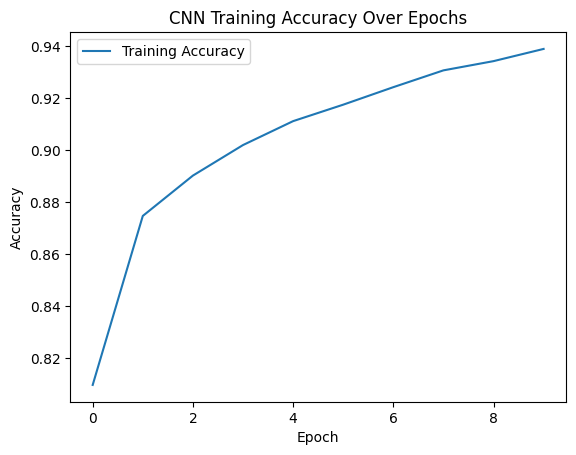

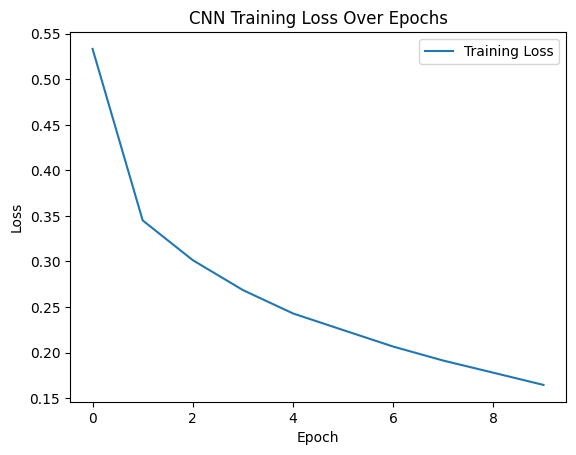

In [ ]:
# Uncomment below lines to Load the model
# from tensorflow.keras.models import load_model
# model = load_model("./models/cnn_model.keras")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy Over Epochs")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Training Loss Over Epochs")
plt.legend()
plt.show()

## CNN Architecture

The CNN used in this project consists of:

1. Conv2D (32 filters, 3×3) + ReLU  
2. MaxPooling2D (2×2)  
3. Conv2D (64 filters, 3×3) + ReLU  
4. MaxPooling2D (2×2)  
5. Flatten  
6. Dense (128 units, ReLU)  
7. Dense (10 units, Softmax)

This architecture is lightweight yet effective for small grayscale images like Fashion-MNIST.

The Convolutional Neural Network achieved 91.23% test accuracy, outperforming both Logistic Regression and Random Forest. Unlike traditional models that operate on flattened pixels, the CNN learns spatial features directly from the 2D images using convolution and pooling layers. This enables the model to detect edges, textures, and shapes that are important for distinguishing different clothing categories. As a result, the CNN captures visual patterns far more effectively, making it the best-performing model for this image classification task.